In [3]:
import matplotlib.pyplot as plt

# Base on 'Intro to ANNs'
import numpy as np

# Sigmoid function
def sigmoid(x):
    return 1.0/(1.0+np.exp(x))

# Derivation
def dsigmoid(x):
    return sigmoid(x)*(1.0-sigmoid(x))

# This exercise demonstrated the sigmoid function via matplotlib plots
# - How can we be sure we have implemented the functions correctly?
# - How might errors be introduced in the future?
# - How can we help avoid these problems?




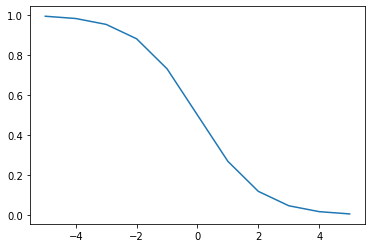

In [4]:
#Lets plot what the output of this sigmoid function is as one way to test it
fig, ax = plt.subplots()

# create out x list 
x = [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5]
# create our y list with the sigmoid of each value in x
y = list(map(lambda x : sigmoid(x), x))


ax.plot(x, y)


This graph is all wrong! Its backwards!
What are some other ways we can identify bugs in our code.

In [5]:
# Using the python assert keyword, our program will throw an error when one of the conditions are not met

assert sigmoid(1) < sigmoid(2), 'Assert sigmoid increases between two poibts'
assert sigmoid(1000) == 1.0, 'Assert sigmoid value at high values'
assert sigmoid(0) == 0.5, 'Assert sigmoid value at 0'
assert sigmoid(-1000) == 0.0, 'Assert sigmoid value at low values'

AssertionError: Assert sigmoid increases between two poibts

In [ ]:
# Base on 'Intro to ANNs'
import numpy as np

# Sigmoid function
def sigmoid(x):
    '''
    >>> sigmoid(1000)
    1.0

    >>> sigmoid(0)
    0.5

    >>> sigmoid(-1000)
    0.0 
    '''
    return 1.0/(1.0-np.exp(-x))
    # return(1/(1 + np.exp(-x)))

# Introducing the doctest Python module
if __name__ == "__main__": # only run the tests when the module is run as a program, not when it is imported
    import doctest
    doctest.testmod()

**********************************************************************
File "__main__", line 10, in __main__.sigmoid
Failed example:
    sigmoid(0)
Expected:
    0.5
Got:
    inf
**********************************************************************
File "__main__", line 13, in __main__.sigmoid
Failed example:
    sigmoid(-1000)
Expected:
    0.0 
Got:
    -0.0
**********************************************************************
1 items had failures:
   2 of   3 in __main__.sigmoid
***Test Failed*** 2 failures.


/tmp/ipykernel_18138/696875460.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  return 1.0/(1.0-np.exp(-x))
/tmp/ipykernel_18138/696875460.py:16: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0-np.exp(-x))


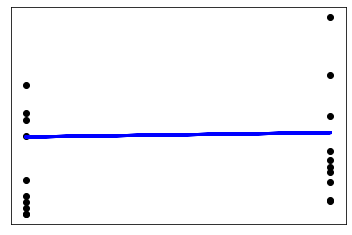

Coefficients: 
 [59.78480979]
Mean squared error: 5501.91


AssertionError: MSE is not in the expected range

In [9]:
## from https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

# Code source: Jaques Grobler
# License: BSD 3 clause
import math

import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
# Good feature :)
# diabetes_X = diabetes_X[:, np.newaxis, 2]
# Bad feature :(
diabetes_X = diabetes_X[:, np.newaxis, 1]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)


# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))

assert(math.isclose(mean_squared_error(diabetes_y_test, diabetes_y_pred), 2548, abs_tol=10**3)), "MSE is not in the expected range"

# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


